
# EDA on Biodiversity

嗨，親愛的閱讀者你們好，我是 Kueichia Lai。

這是一個來自 <a href = "https://www.codecademy.com/learn " target = "_blank">CodeCademy</a> 的項目，目標是分析來自美國國家公園的生物多樣性，尤其是在不同國家公園位置觀察到的各種物種的數據。

本項目將初步探索、分析、準備、繪製資料圖表，並試圖解釋分析的結果。

有兩份檔案，分別為 species_info.csv 和 observations.csv 。

species_info.csv 包含了物種的種類、學名、俗名、保護狀況，conservation_status 則是保存過去7天在幾個國家國家公園看到不同物種的次數記錄。


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

## 初步探索

In [3]:
display(species.head(10))
display(observations.head(10))

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [4]:
print(species.info())
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [5]:
# pandas_profiling.ProfileReport(species)

In [6]:
# pandas_profiling.ProfileReport(observations)

In [7]:
print('species的形狀：',species.shape)

species的形狀： (5824, 4)


In [8]:
print('species上記載了',species.scientific_name.nunique(),'種獨特物種')

species上記載了 5541 種獨特物種


In [9]:
print('物種的種類總共分',species.category.nunique(),'類，種類為',species.category.unique())

物種的種類總共分 7 類，種類為 ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [10]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [11]:
species.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,80,80,7
Bird,521,521,79
Fish,127,127,11
Mammal,214,214,38
Nonvascular Plant,333,333,5
Reptile,79,79,5
Vascular Plant,4470,4470,46


In [12]:
print('物種的保護狀態有',species.conservation_status.nunique(),'種，分別為',species.conservation_status.unique())

物種的保護狀態有 4 種，分別為 [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [13]:
print('保護狀態為nan的資料總共有', species.conservation_status.isna().sum(),'筆')

保護狀態為nan的資料總共有 5633 筆


In [14]:
species.groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,16,16,16
In Recovery,4,4,4
Species of Concern,161,161,161
Threatened,10,10,10


In [15]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [16]:
print('observations的形狀：',observations.shape)

observations的形狀： (23296, 3)


In [17]:
print('資料中的國家公園有',observations.park_name.nunique(),'間，分別為：',observations.park_name.unique())

資料中的國家公園有 4 間，分別為： ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [18]:
print('過去7天，總共有',observations.observations.sum(),'次觀察機會')

過去7天，總共有 3314739 次觀察機會


In [19]:
observations.groupby(['park_name'])['observations'].sum()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

### 資料初探：

- species中共有 5824 筆資料，包含了物種的種類 category、學名 scientific_name、俗名 common_names、保護狀況 conservation_status。


- 國家公園裡面有 5541 個獨特的物種。


- 物種的種類分為7類：哺乳動物 Mammal、鳥類 Bird、爬蟲類 Reptile、兩棲類 Amphibian、魚類 Fish、維管束植物 Vascular Plant，及非維管束植物 Nonvascular Plant，其中以維管束植物 4470筆 為大宗。


- 物種的保護狀態中，有 5633 個 nan 值，代表有 5633 個物種目前無危，另外需關注Species of Concern 的物種有 161 個，受威脅Threatened 的有 10 個物種，瀕危Endangered 為 16 個物種，還有恢復中In Recovery 的 4 個物種。


- observations 中共有 23296 筆資料，記錄了過去七天內物種被觀察到的次數和地點。


- 紀錄中的國家公園共有4間，分別為大煙山國家公園Great Smoky Mountains National Park、優勝美地國家公園Yosemite National Park、布萊斯峽谷國家公園Bryce National Park，及黃石國家公園Yellowstone National Park。


- 過去七天內總共有 3314739 次觀察機會，布萊斯峽谷國家公園 576025 次、大煙山國家公園 431820 次、黃石國家公園 1443562 次，及優勝美地國家公園 863332 次。


## 資料初步分析

species 中的 conservation_status 有需多缺失值 nan ，不利於資料分析，需要轉換成其他值。

In [20]:
species.conservation_status.fillna('No Intervention',inplace=True)
species.groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,16,16,16
In Recovery,4,4,4
No Intervention,5633,5633,5633
Species of Concern,161,161,161
Threatened,10,10,10


In [21]:
conservation_category = species[species.conservation_status != 'No Intervention']\
                                .groupby(['conservation_status','category'])\
                                ['scientific_name'].nunique().unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


需關注Species of Concern 的物種以鳥類最多，有 68 種；瀕危Endangered 則以哺乳類最多，有 6 種。

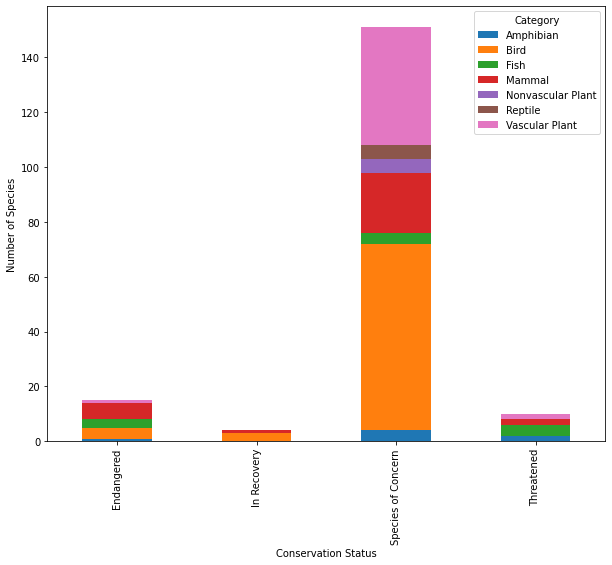

<Figure size 432x288 with 0 Axes>

In [22]:
ax1 = conservation_category.plot.bar(stacked=True, figsize=(10,8))
ax1.set_xlabel('Conservation Status')
ax1.set_ylabel('Number of Species')
plt.legend(title='Category')
plt.show()
plt.clf()

In [23]:
species['is_protected'] = species.conservation_status !=  'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [24]:
species_protected = species.groupby(['category','is_protected'])['scientific_name']\
                        .nunique().reset_index()
species_protected

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [25]:
category_counts = species_protected\
                    .pivot(columns='is_protected', values='scientific_name', index='category')\
                    .reset_index()
category_counts.columns = ['category', 'not_protected', 'is_protected']
category_counts

,category,not_protected,is_protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


非保育類物種中，以維管束植物 4216 種最多，其次是鳥類 413 種；保育類物種則以鳥類 75 種最多。

In [26]:
category_counts['protected_perc'] = category_counts.is_protected /\
                                        (category_counts.not_protected + category_counts.is_protected) \
                                        * 100

category_counts

,category,not_protected,is_protected,protected_perc
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


保育類物種的比例，哺乳類 17.04% 最高，其次為鳥類 15.36%。

### 檢驗動物種類間的保育情況有無顯著差異
使用卡方檢定

In [27]:
from scipy.stats import chi2_contingency

contingency1 = np.array([[75, 413],[30,146]])
chi2, p, dof, ex = chi2_contingency(contingency1)
p

0.6875948096661336

p value > 0.05 ，鳥類與哺乳類的保育情況沒有顯著的差異

In [28]:
contingency2 = np.array([[5, 73],[30,146]])
chi2, p, dof, ex = chi2_contingency(contingency2)
p

0.03835559022969898

p value < 0.05 ，爬蟲類與哺乳類的保育情況有顯著差異

### 分析

- 需關注Species of Concern 的物種以鳥類最多，有 68 種；瀕危Endangered 則以哺乳類最多，有 6 種。


- 非保育類物種中，以維管束植物 4216 種最多，其次是鳥類 413 種；保育類物種則以鳥類 75 種最多。


- 保育類物種的比例，哺乳類 17.04% 最高，其次為鳥類 15.36%。


- 使用卡方檢定檢驗種類間的保育情況有無顯著差異，鳥類與哺乳類的保育情況沒有顯著的差異，然而爬蟲類與哺乳類的保育情況則有顯著差異。

以上就是生物多樣性項目的分析，謝謝你們閱讀到最後，我是Kueichia Lai。